In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load the dataset in Python environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customer_data = pd.read_csv('/content/drive/MyDrive/Datasets/Wholesale customers data.csv')

##Analysing the data

In [ ]:
customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
customer_data['Channel'].value_counts()

,count
Channel,
1,298
2,142


In [ ]:
customer_data['Region'].value_counts()

,count
Region,
3,316
1,77
2,47




 all columns contains numerical values whereas channel and region are categorical








##Checking for duplicates

In [ ]:
customer_data.duplicated().sum()

0

##checking for missing values

In [ ]:
customer_data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
customer_data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
# Preprocess data: Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_data_normalized = scaler.fit_transform(customer_data)

In [ ]:
# Assign scaled variables as x
x = pd.DataFrame(customer_data_normalized, columns=customer_data.columns)
print(x)

      Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1    1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2    1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3   -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4    1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   
..        ...       ...       ...       ...       ...       ...   
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441   
439 -0.690297  0.590668 -0.729307 -0.555924 -0.573227 -0.620094   

     Detergents_Paper  Delicassen  
0           -0.043569   -0.066339  
1            0.086407    0.089151  
2            0.133232    2.243293  
3           -0.498588    0.093411  
4           -0.

###Clustering Techniques

In [ ]:
#import necessary libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# K-Means Clustering
inertia = []
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x, labels))

In [ ]:
inertia

[2600.3756482224435,
 2149.2839562217573,
 1851.8408722743864,
 1567.449355005607,
 1446.434958635648,
 1189.4373315151008,
 1146.3938222781724,
 1082.6398816370165]

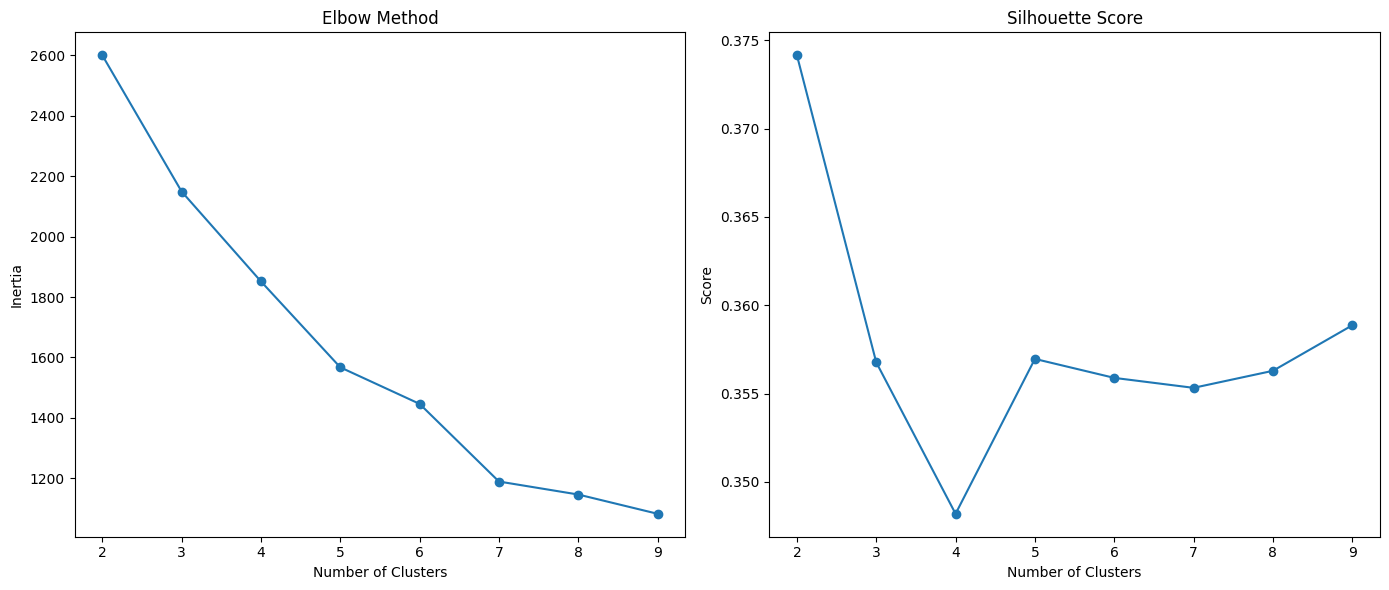

In [ ]:
# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'o-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'o-')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

In [ ]:
# Optimal K
optimal_k = silhouette_scores.index(max(silhouette_scores)) +2

In [ ]:
#K-Means Model
kmeans = KMeans(n_clusters=optimal_k, n_init =10,random_state=42)

In [ ]:
KMeans_Cluster=kmeans.fit_predict(x)

In [ ]:
customer_data["KMeans_Cluster"] = kmeans.fit_predict(x)

In [ ]:
pd.Series(KMeans_Cluster).value_counts()

,count
0,306
1,134


In [ ]:
customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


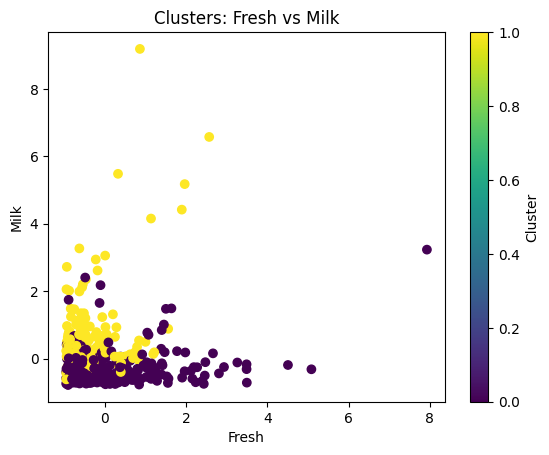

In [ ]:
# plot the features based on k mean clusters# Example pair: Fresh vs Milk
plt.scatter(x["Fresh"], x["Milk"], c=customer_data["KMeans_Cluster"], cmap="viridis")
plt.title("Clusters: Fresh vs Milk")
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.colorbar(label="Cluster")
plt.show()

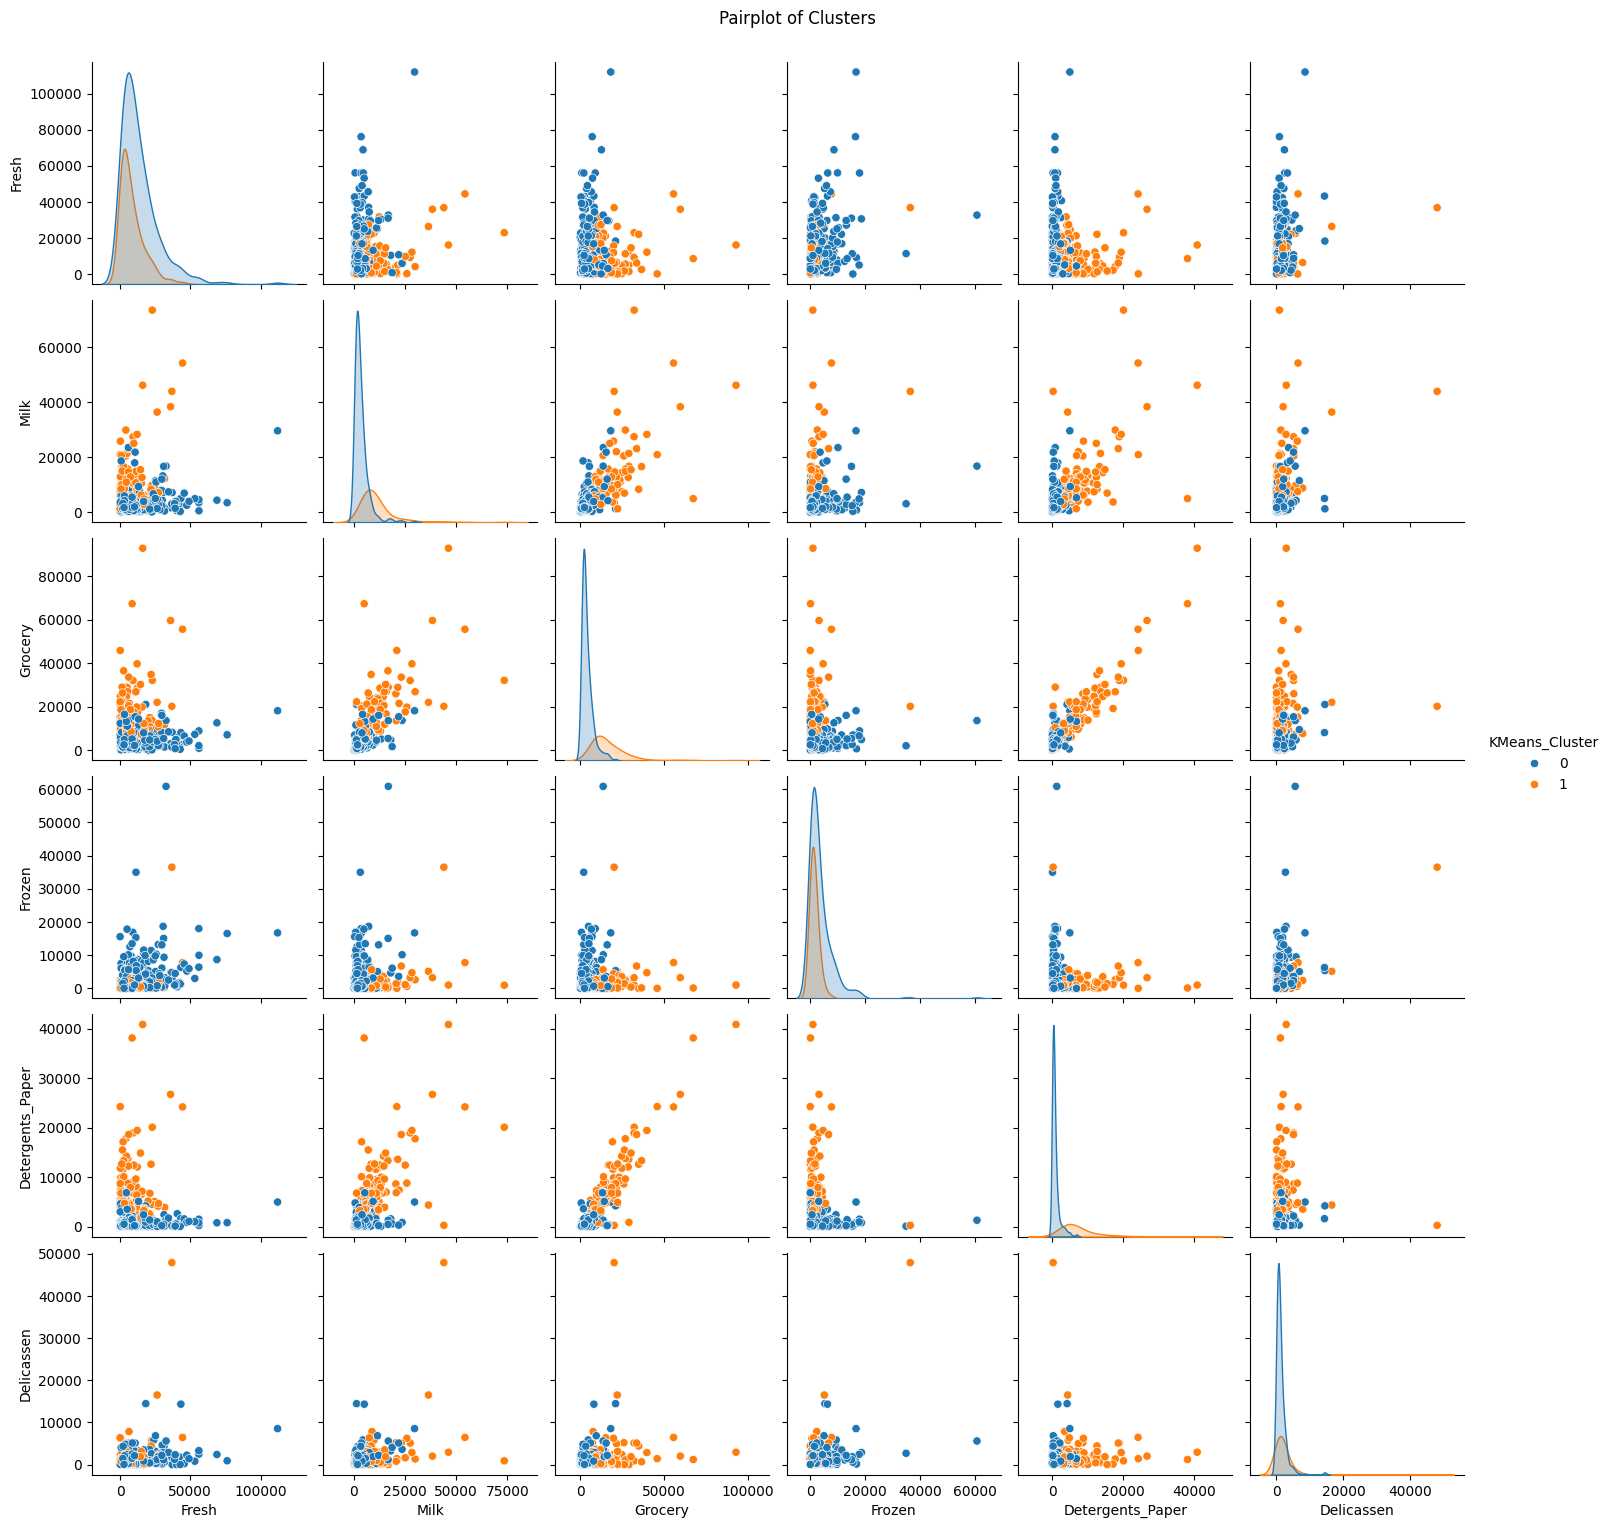

In [ ]:
# Pairplot for all possible combinations
sns.pairplot(customer_data, vars=["Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper","Delicassen"], hue="KMeans_Cluster")
plt.suptitle("Pairplot of Clusters", y=1.02)
plt.show()

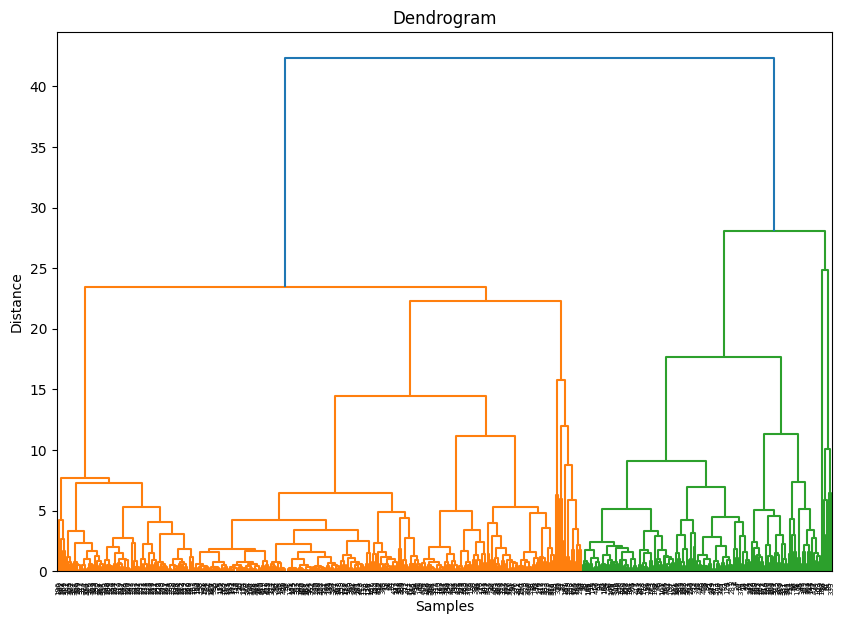

In [ ]:
# Hierarchical Clustering
linkage_matrix = linkage(x, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [ ]:
# Agglomerative Clustering with optimal clusters
optimal_clusters_hierarchical = 25  # Set based on dendrogram
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=optimal_clusters_hierarchical, linkage='ward')
customer_data["Hierarchical_Cluster"] = agg_cluster.fit_predict(customer_data_normalized)


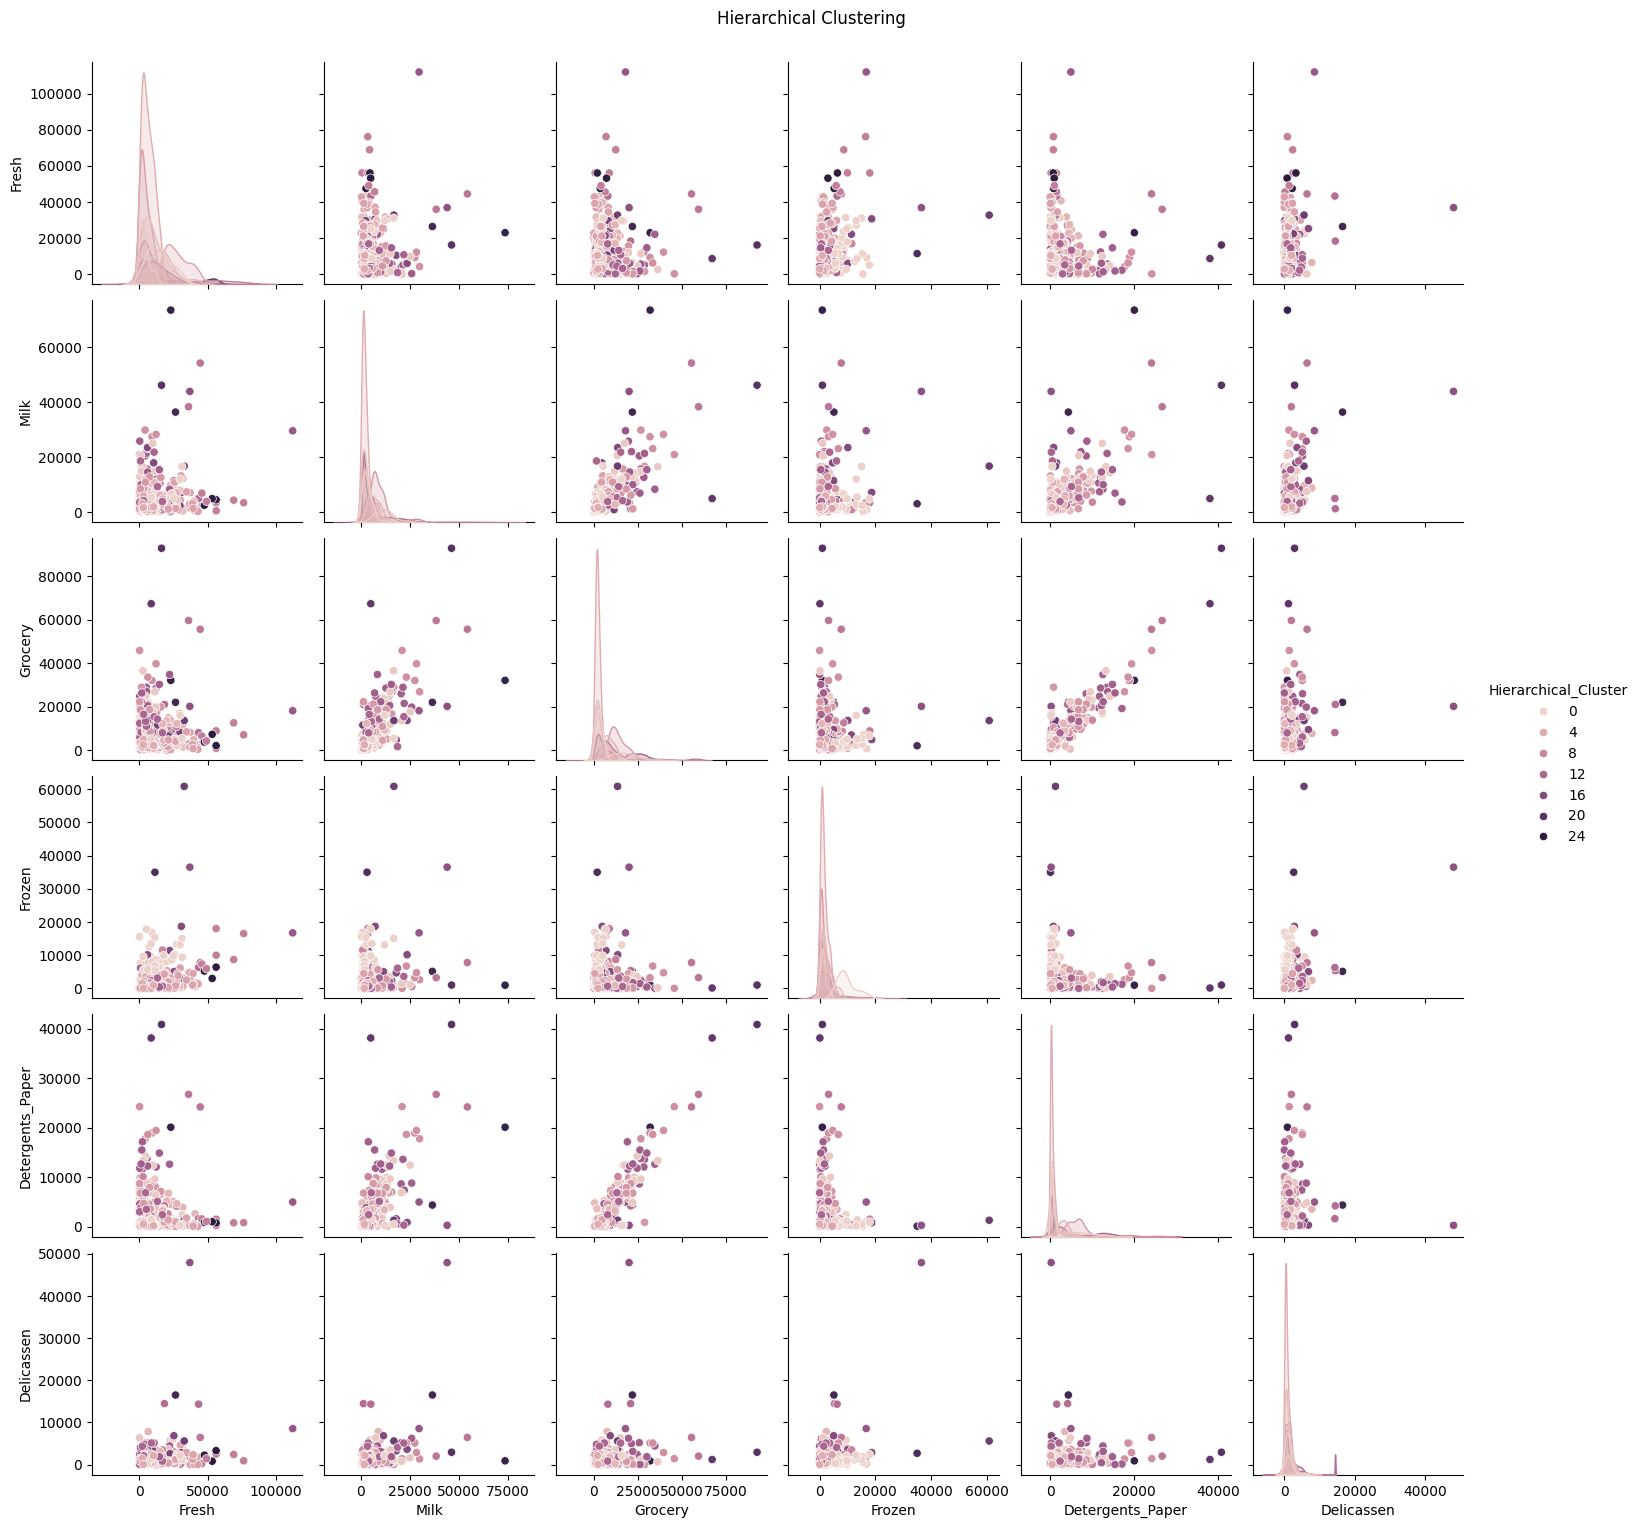

In [ ]:
sns.pairplot(customer_data, vars=["Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper","Delicassen"],hue="Hierarchical_Cluster", diag_kind="kde")
plt.suptitle("Hierarchical Clustering", y=1.02)
plt.show()

In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=2)
customer_data["DBSCAN_Cluster"] = dbscan.fit_predict(customer_data_normalized)

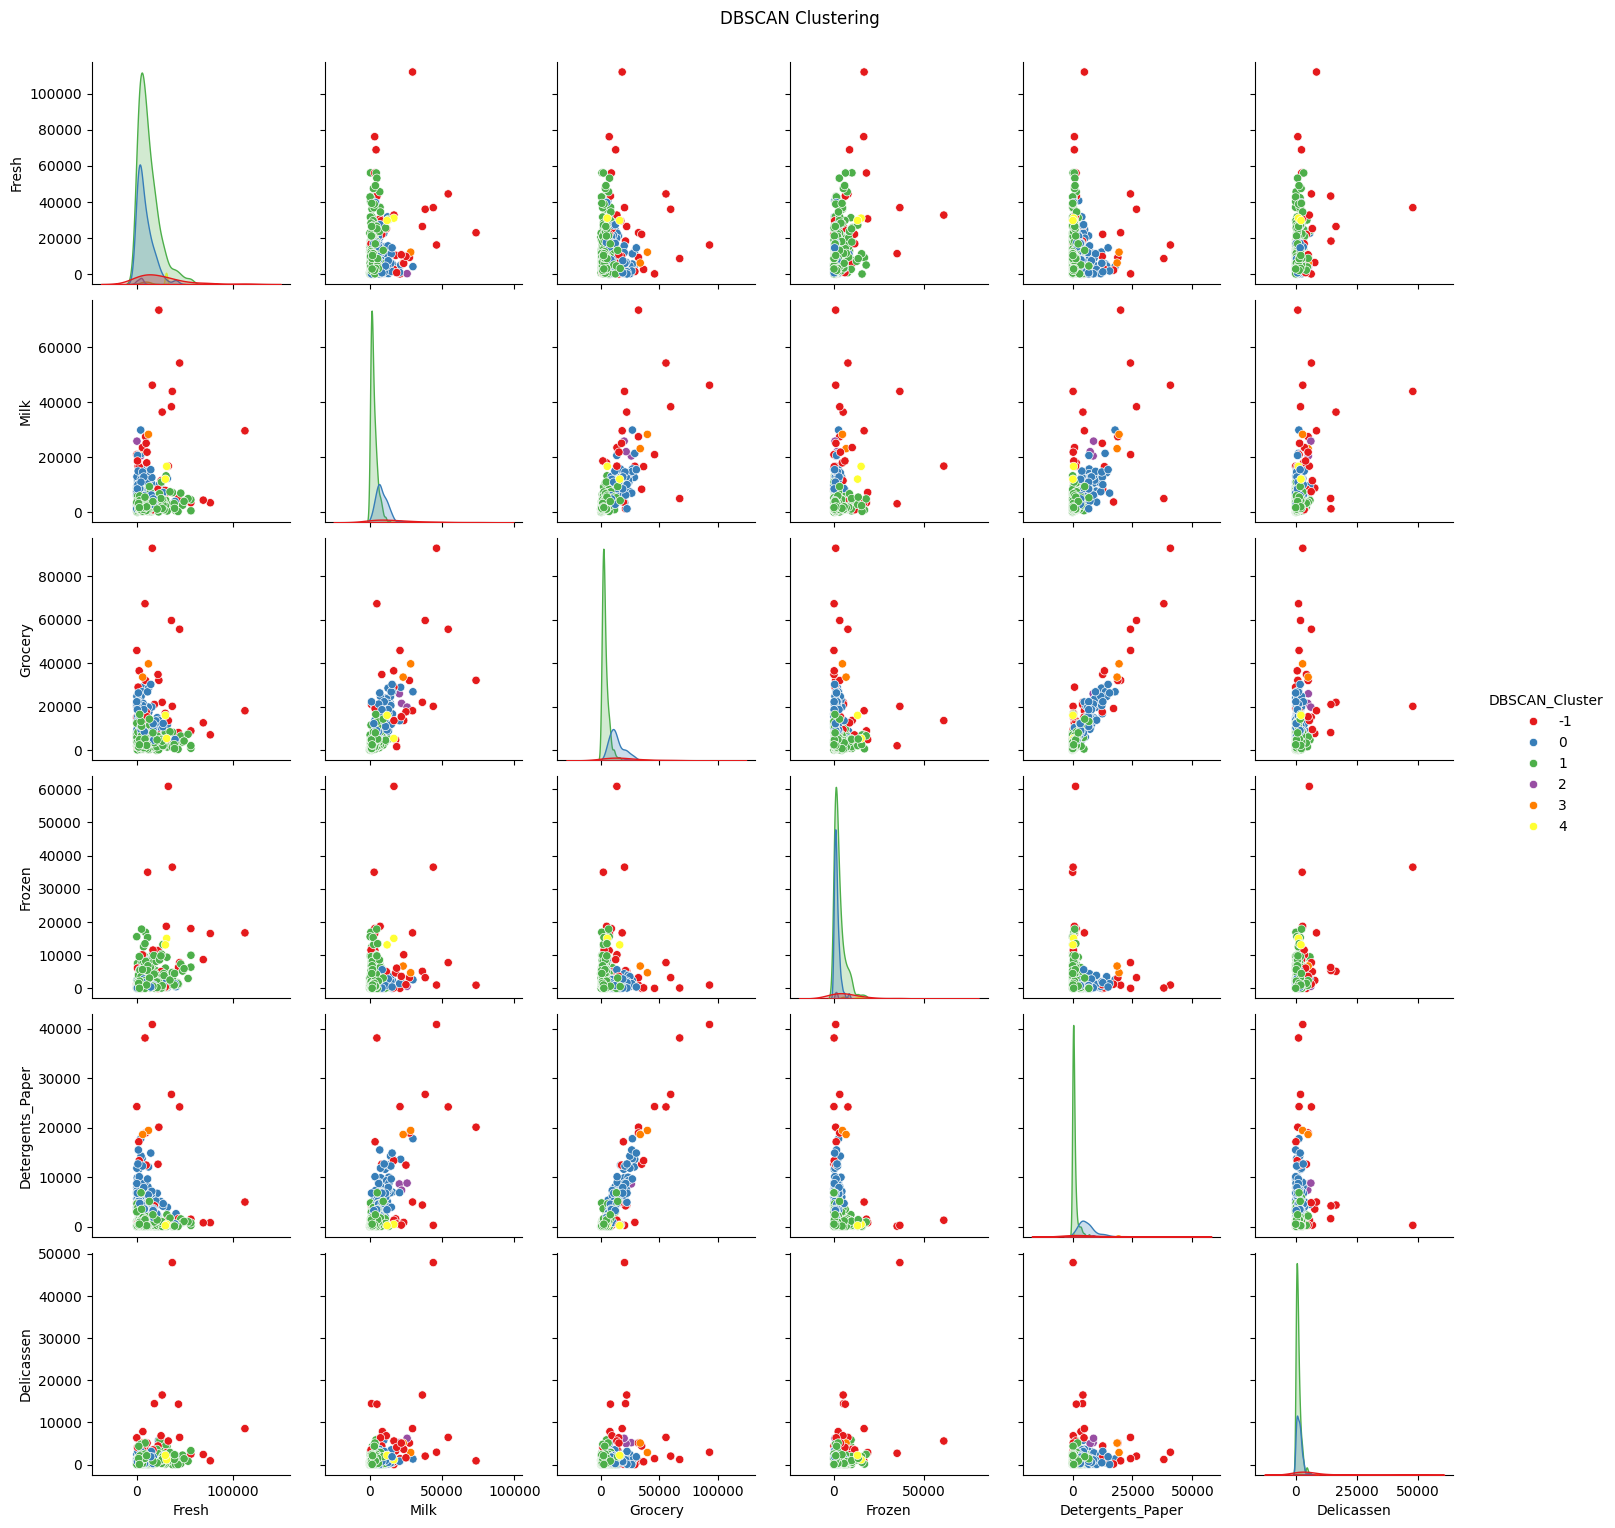

In [ ]:
# Visualize Results
sns.pairplot(customer_data,vars=["Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper","Delicassen"], hue="DBSCAN_Cluster", diag_kind="kde", palette="Set1")
plt.suptitle("DBSCAN Clustering", y=1.02)

plt.show()